In [1]:
# install packages with conda in jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} #package name here


CondaValueError: invalid package specification: #package



In [2]:
# install packages with pip in jupyter notebook
import sys 
!{sys.executable} -m pip install #package name here

Invalid requirement: '#package'
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "C:\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 37

In [3]:
import tweepy
from textblob import TextBlob # library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) 
import sys
import matplotlib.pyplot as plt

In [4]:
def percentage (tweetstoanalyze,totaltweets): # needed for the pie chart later, it simply calculates the pecentage
    return 100* float(tweetstoanalyze)/float(totaltweets)

In [5]:
#storing my personal Twitter API codes (I think these are time sensitive, therefore may not work in the future, but it is reproducible with any other person`s twitter api codes)
consumerKey = 'd0hqZtamZjKyIKgGJj8sWI0bL'
consumerSecret = 'Aztf6p9hmNWN3lGLHoUFoZCc1mMZ38tG1KDMPsr5hBiyr0zQl5'
accessToken = '220113845-hcduf2dHyCZpZw7v2nCYI63svRomkArDz4rPyYro'
accessTokenSecret = 'W52ICvtvm8fK4JoejBaxFqDJin5qDcyIE7KVhVsv1oYWr'

In [6]:
# this script authenticates the app by using the codes
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth,wait_on_rate_limit=True) # the wait_on_rate_limit parameter will make the rest of the code obey Twitter`s 
                                               # call rate limit by waiting as much as needed in order to avoid Twitter error 429
                                              # the parameter can be removed if necessary

In [7]:
word = input("Enter keyword or hashtag ") # which word (or hashtag) to search

Enter keyword or hashtag #Cristiano


In [8]:
tweetsN = int(input("Enter number of tweets ")) # how many tweets

Enter number of tweets 50


In [9]:
# retrieving the tweets (only english)
tweets  = tweepy.Cursor(api.search, q=word, language="English").items(tweetsN)

In [10]:
# initializing accumulators
pos=0 # number of positive tweets
neg=0 # number of negative tweets
neut=0 # number of neutral tweets


for tweet in tweets: #loop all the tweets obtained above
    applyblob= TextBlob(tweet.text) # this will automatically give the sentiment of the sentence
                                    # a value between -1 and zero (not included) for negative sentences
                                    # a value between 0 (not included) and +1 for positive sentences
                                    # and zero for neutral sentences

    
    if (applyblob.sentiment.polarity==0): # if tweet is neutral add 1 to neutral (the command .sentiment.polarity is part of textblob)
        neut +=1
    elif (applyblob.sentiment.polarity<0): #  if tweet is negative add 1 to negative
        neg +=1
    elif (applyblob.sentiment.polarity>0): #  if tweet is postivie add 1 to positive
        pos +=1
    

In [11]:
# transforming into percentage of the whole tweets
pos= percentage (pos,tweetsN)
neg= percentage (neg,tweetsN)
neut= percentage (neut,tweetsN)


#limiting to 2 decimal values for clarity
pos= format(pos,".2f")
neg= format(neg,".2f")
neut= format(neut,".2f")


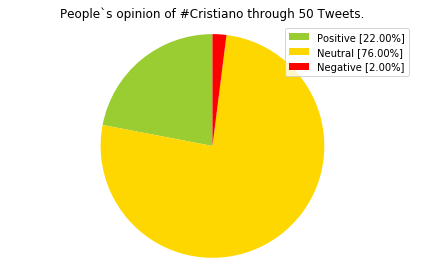

In [12]:
# script for pie chart
labels=["Positive ["+str(pos)+"%]","Neutral ["+str(neut)+"%]", "Negative ["+str(neg)+"%]"]
sizes= [pos, neut,neg]
colors= ["yellowgreen","gold","red"]
patches,texts =plt.pie (sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title ("People`s opinion of " + word + " through " + str(tweetsN) + " Tweets.")
plt.axis("equal")
plt.tight_layout()
plt.show()